# The K-means Method

## Overview

In this section, we will review one of the most used clustering methods i.e <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means clustering</a>. This  is a clustering methodology originating from the field of signal processing.
It aims to partition $N$ observations into $k$ clusters such that  each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster [1]. The prototype of each cluster is also called the cluster centroid. This approach results in a partitioning of the data space into Voronoi cells [1]. The algorithm we will discuss, minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances [1]. 

The algorithm determines a single cluster for each data point and tends to find clusters of comparable spatial extent.
This is in contrast to the Gaussian mixture model that allows clusters to have different shapes. K-means can be considered the hard version of
the Gaussian mixture model. In addition, the algorithm has different flavours such as k-medians and k-medoids.

A nice tutorial illustrating the assumptions of the K-means algorithm can be found at <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py">Demonstration of k-means assumptions</a>. This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. 

##  The K-means method

Let's consider a dataset $D$ we would like to group the data points into $k$ distinct groups. This is shown in
the image below

In [2]:
import numpy as np
import matplotlib.pyplot as plt

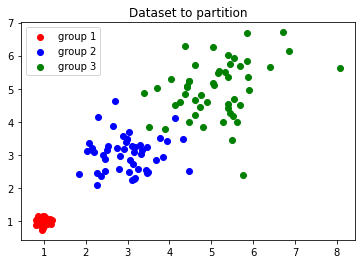

In [3]:
np.random.seed(42)

x1 = np.random.normal(1.0, 0.1, 50)
y1 = np.random.normal(1.0, 0.1, 50)

x2 = np.random.normal(3.0, 0.6, 50)
y2 = np.random.normal(3.0, 0.6, 50)

x3 = np.random.normal(5.0, 0.8, 50)
y3 = np.random.normal(5.0, 0.8, 50)


plt.scatter(x1, y1, color='r', label="group 1")
plt.scatter(x2, y2, color='b', label="group 2")
plt.scatter(x3, y3, color='g', label="group 3")

plt.title("Dataset to partition")
plt.legend(loc="upper left")
plt.show()

Let's denote the centroid of cluster $j$ as $\mu_j$. The centroid is just the mean of all the points within the
cluster $C_j$:

\begin{equation}
\mu_j = \frac{1}{n_j}\sum_{i\in C_j}x_i
\end{equation}

where $i \in C_j$ denotes that the $i-th$ data point belonging in cluster $C_j$, and $n_j$ denotes the number of points in $C_j$.
The intra-cluster average distance between samples and centroids is defined as

\begin{equation}
S = \sum_{j=1}^k \sum_{i\in C_j}||x_i - \mu_j||^2
\end{equation}

$S$ is also called the inertia. High levels of inertia imply low cohesion; too many points belong to clusters whose centroids are far away. Minimizing the expression above is <a href="https://en.wikipedia.org/wiki/NP-hardness">NP-hard</a>. Thus the K-means algorithm employs an approach known as <a href="https://en.wikipedia.org/wiki/Lloyd's_algorithm">Looyd's algorithm</a>.

Lloyd's algorithm, also known as Voronoi iteration or relaxation, finds evenly spaced sets of points in subsets of Euclidean spaces and partitions of these subsets into well-shaped and uniformly sized convex cells. The algorithm repeatedly finds the centroid of each set in the partition and then re-partitions the input according to which of these centroids is closest. 

For a dataset $\mathbf{D}$, we start the process by choosing the initial centroids. There are no specific restrictions
on the initial values, however the choice can influence the convergence of the algorithm as well as the minimum that is found.
The procedure loops over the dataset and computes the Euclidean distance between $x_i \in \mathbf{D}$ and $\mu_j$ i.e. $d(x_i, \mu_j)$. The algorithm assigns the point $x_i$ to the cluster with the smallest $d(x_i, \mu_j)$. Once  all the points have been
clustered, a new set of centroids is computed. This procedure is repeated either until a specified number of iterations is reached or if the new $S$ is smaller than a predefined threshold. This is summrised below

----
**Algorithm: K-means**

1. Input:
    - Set number of iterations $N$
    - Set the number of clusters $k$
    - Set the tolerance $T$ denoting the convergence
2. Execute
    - Initialize the centroids $\mu_j$
    - Compute the initial inertia $S_0$
3. Iterate
    - While $i<N$ or $||S_i-S_{i-1}||>T$ do
        - For every point $x_j \in \mathbf{D}$ assign a cluster $C_k$ according to the shortest distance found
        - Recompute the centroids accounting the new assignment of the points
        - Recompute the inertia $S_{i}$




---

----
**Remark: Cluster Initialization**

There are several alternatives as to how to initialize the clusters. For example, we could draw each coordinate from the domain’s boundaries randomly, or using actual points from the  dataset [2]. However, a solution that has several advantages is randomly perturbing $k$ points casually drawn from the
dataset [2]. This has the following advantages [2]:

- If each coordinate of a centroid was generated completely at random, we would have to first scan the dataset to find the acceptable range for each coordinate. We avoid this by randomly perturbing $k$ points drawn from the dataset
- By uniformly drawing points from the dataset, the centroids will be close to points in the data and centroids will be drawn with higher probability in areas with higher density of points.
- Randomly perturbing the points,  reduces the risk that all the generated points will be concentrated in the denser areas.

----

### Issues

The K-means algorithm is simple that is why it has gained popularity. In addition, when the clusters 
have approximately a spherical shape and are <a href="https://en.wikipedia.org/wiki/Linear_separability">linearly separable</a> the algorithm does  a pretty good job, see Example 1 below. It should also be noted that the algorithm is able to correctly identify clusters with different density.However, the algorithm has several weaknesses which we discuss bellow. 

The first weakness of the algorithm is that it cannot detect outliers [2]. In fact, outlier points are added to the closest clusters. Recall that in general the mean is sensitive to outliers.  Since centroids are computed as the centers of the mass of the clusters, the centroids of the clusters will be pulled by outliers away from the best position they could hold. Therefore, we should remove outliers from the data set before performing K-means clustering.

The second point to notice, is that the algorithm can only produce/distinguish spherical clusters [2]. However, in real data sets not all clusters are spherical.

Furthermore, if the clusters in the data set are not linearly separable, then it is difficult to approximate them with spherical clusters. As a result  k-means cannot separate non-convex clusters e.g. clusters shaped as two concentric rings [2]. Thus, in these situations, the algorithm will have some hard time in order to find good solutions.

The fourth point to remember is that the algorithm cannot automatically find the number of clusters present in the data set. Instead it expects this as an input. This
means that unless we have some insight deriving from domain knowledge that indicates the number of clusters,
we will need to run the algorithm multiple times, trying different values for the number of centroids, and comparing the results using some kind of metric.
One way to determine the number of clusters using the so-called <a href="https://www.scikit-yb.org/en/latest/api/cluster/elbow.html">elbow method</a>. In this method,  we select the optimal number of clusters by fitting the model with a range of values for $k$ . If the line chart resembles an arm, then the _elbow_ (the point of inflection on the curve) is a good indication that the underlying model fits best at that point, see example 3. 

## Example 1

In this example we want to cluster points coming from three diifferent normal distributions.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
np.random.seed(42)

x1 = np.random.normal(1.0, 0.1, 50)
y1 = np.random.normal(1.0, 0.1, 50)

x2 = np.random.normal(3.0, 0.6, 50)
y2 = np.random.normal(3.0, 0.6, 50)

x3 = np.random.normal(5.0, 0.8, 50)
y3 = np.random.normal(5.0, 0.8, 50)

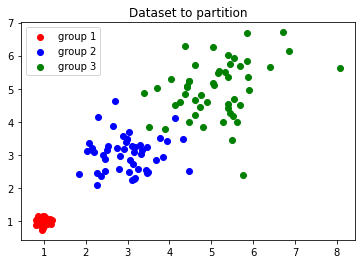

In [6]:
plt.scatter(x1, y1, color='r', label="group 1")
plt.scatter(x2, y2, color='b', label="group 2")
plt.scatter(x3, y3, color='g', label="group 3")

plt.title("Dataset to partition")
plt.legend(loc="upper left")
plt.show()

In [7]:
# mix the data
x = []
y = []
z = []

for i in range(50):
    x.append([x1[i], y1[i]])
    y.append([x2[i], y2[i]])
    z.append([x3[i], y3[i]])

X = np.vstack([x, y,z])

In [8]:
kmeans = KMeans(n_clusters=3, n_init=4, random_state=42)
pred = kmeans.fit_predict(X)

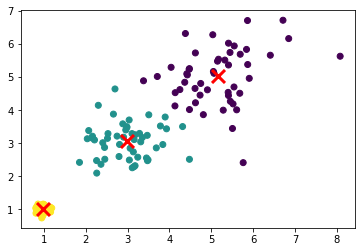

In [9]:
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)

plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.show()

## Example 2

This example is taken from <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py">Demonstration of k-means assumptions</a> and illustreates the fact that k-means may find it difficult to cluster points that are not isotropic  

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

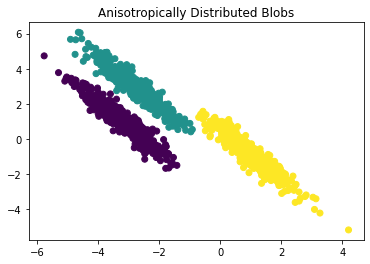

In [16]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
plt.title("Anisotropically Distributed Blobs")
plt.show()

Run the algorithm and visualize the results.

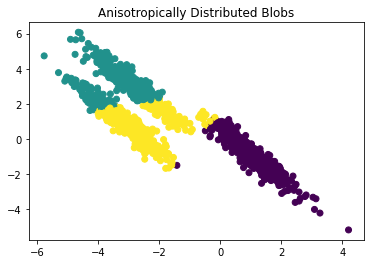

In [17]:
common_params = {
    "n_init": 4,
    "random_state": random_state,
}
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("K-means Anisotropically Distributed Blobs")
plt.show()

## Example 3

The K-means algorithm requires the number of clusters to be found as an input. How can we find a right value for this? We have already mentioned that one way to determine the number of clusters is by using the so-called <a href="https://www.scikit-yb.org/en/latest/api/cluster/elbow.html">elbow method</a>. In this method,  we select the optimal number of clusters by fitting the model with a range of values for $k$ . If the line chart resembles an arm, then the _elbow_ (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. We will use the data from Example 1 to demonstrate this.

In [19]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [20]:
np.random.seed(42)

x1 = np.random.normal(1.0, 0.1, 50)
y1 = np.random.normal(1.0, 0.1, 50)

x2 = np.random.normal(3.0, 0.6, 50)
y2 = np.random.normal(3.0, 0.6, 50)

x3 = np.random.normal(5.0, 0.8, 50)
y3 = np.random.normal(5.0, 0.8, 50)

# mix the data
x = []
y = []
z = []

for i in range(50):
    x.append([x1[i], y1[i]])
    y.append([x2[i], y2[i]])
    z.append([x3[i], y3[i]])

X = np.vstack([x, y,z])

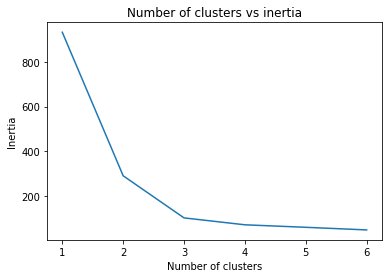

In [23]:
ks = [1,2,3,4,5,6]

inertias  = []
for k in ks: 
    kmeans = KMeans(n_clusters=k, n_init=4, random_state=42)
    pred = kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    
plt.plot(ks, inertias)
plt.title("Number of clusters vs inertia")
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.show()

When using the elbow method, we select as the number of clusters to use the minimum number of clusters where the inertia starts to decrease linearly.
In our case this appears to be $k=3$.

## Summary

In this section we reviewed the K-means algorithm. K-means is a centroid-based hard-clustering method. It is a good option only for low-to-medium-dimensional (with at most around 20 dimensions) datasets where we know that clusters can be accurately approximated with hyperspheres i.e. cluster shapes are spherical and the number of clusters can be estimated a priori [2]. It also works well even if the dataset does not have a homogeneous distribution. On the other hand, the algorithm works poorly on high-dimensional data, and when clusters cannot be approximated with hyperspheres [2].

The algorithm expects the number of clusters to be found in the data. In order to have a good estimate of what this number may be,
we introduced the _elbow_ method.

## References

1. <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means clustering</a>
2. 1. Marcello La Rocca, _Advanced algorithms and data structures_, Manning Publications.